In [1]:
import numpy as np
import torch
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from train import train_bc_agent

%load_ext autoreload
%autoreload 2

In [2]:
import os
from run_expert import run_expert
from train import train_bc_agent
from agent import run_agent

def run_experts(max_timesteps=100, num_rollouts=20, render=False, quiet=False):
  returns = {}
  for filename in os.listdir('./experts/'):
    env_name = filename[:-4]

    returns[env_name] = run_expert(f"./experts/{filename}", 
                                   env_name, 
                                   max_timesteps=max_timesteps, 
                                   num_rollouts=num_rollouts, 
                                   render=render, 
                                   quiet=quiet)
  return returns
  
  
def train_bc_agents():
  result = {}
  for filename in os.listdir('./expert_data/'):
    expert_name = filename[:-4]
    
    print(f"Training bc agent for {expert_name}")
    _, train_losses, test_losses = train_bc_agent(expert_name)
    
    result[expert_name] = (agent, train_losses, test_losses)
  return result


def plot_losses(agent_name, train_losses, test_losses):
  n_epochs = len(test_losses) - 1

  x_train = np.linspace(0, n_epochs, len(train_losses))
  x_test = np.arange(n_epochs + 1)

  plt.figure()
  plt.plot(x_train, train_losses, label='train loss')
  plt.plot(x_test, test_losses, label='test loss')
  plt.title(agent_name)
  plt.legend()
  plt.show()

In [4]:
expert_returns = run_experts(max_timesteps=100, num_rollouts=50, quiet=True)

/Users/leourbina/.pyenv/versions/anaconda3-2019.10/envs/cs285/lib/python3.8/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
 12%|█▏        | 6/50 [00:00<00:02, 21.07it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


 40%|████      | 20/50 [00:00<00:00, 97.67it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


 10%|█         | 5/50 [00:00<00:00, 45.11it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


 20%|██        | 10/50 [00:00<00:00, 45.18it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


 86%|████████▌ | 43/50 [00:00<00:00, 209.03it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


  4%|▍         | 2/50 [00:00<00:03, 15.22it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


100%|██████████| 50/50 [00:03<00:00, 15.39it/s]


In [ ]:
result = train_bc_agents()

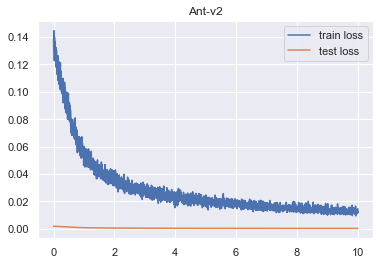

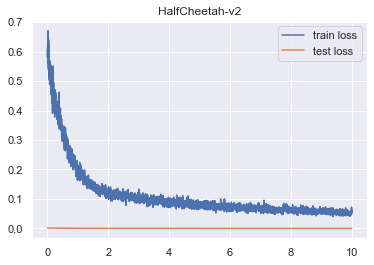

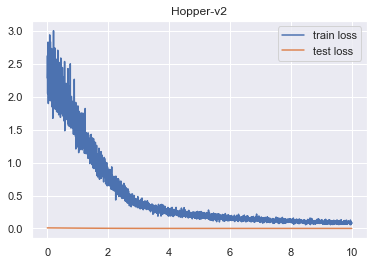

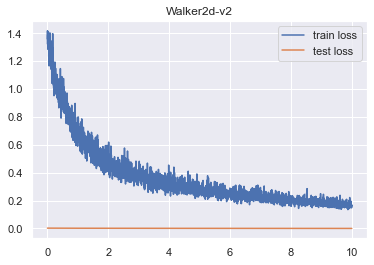

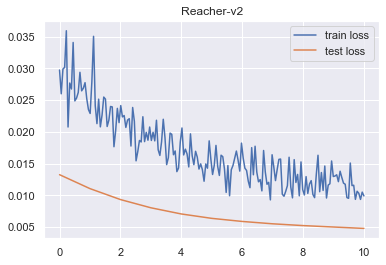

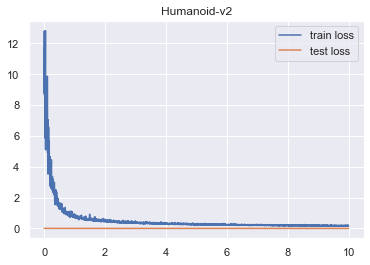

In [119]:
for agent_name in result.keys():
    _, train_losses, test_losses = result[agent_name]
    plot_losses(agent_name, train_losses, test_losses)

In [8]:
returns = run_agent('./trained_agents/Ant-v2-bc', 'Ant-v2', num_rollouts=10, max_timesteps=1000)

  0%|          | 0/10 [00:00<?, ?it/s]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000


 10%|█         | 1/10 [00:00<00:05,  1.54it/s]

700/1000
800/1000
900/1000
1000/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000


 20%|██        | 2/10 [00:01<00:05,  1.52it/s]

900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000


 30%|███       | 3/10 [00:01<00:04,  1.52it/s]

700/1000
800/1000
900/1000
1000/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000


 40%|████      | 4/10 [00:02<00:03,  1.53it/s]

900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000


 50%|█████     | 5/10 [00:03<00:03,  1.49it/s]

900/1000
1000/1000
iter 5
100/1000


 60%|██████    | 6/10 [00:03<00:02,  1.75it/s]

200/1000
300/1000
400/1000
iter 6
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000


 70%|███████   | 7/10 [00:04<00:01,  1.66it/s]

800/1000
900/1000
1000/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000


 80%|████████  | 8/10 [00:05<00:01,  1.59it/s]

900/1000
1000/1000
iter 8
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000


 90%|█████████ | 9/10 [00:05<00:00,  1.54it/s]

800/1000
900/1000
1000/1000
iter 9
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

800/1000
900/1000
1000/1000
